In [1]:
# Sourcing and Loading data 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings # For handling error messages 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd") 

In [3]:
eth = pd.read_csv('EthereumData.csv') 

In [4]:
eth.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,6-Jan-21,"1,207.77","1,099.77","1,210.78","1,060.67",3.75M,9.85%
1,5-Jan-21,"1,099.52","1,042.48","1,131.56",976.91,3.25M,5.48%
2,4-Jan-21,"1,042.40",977.76,"1,158.27",894.24,5.19M,6.92%
3,3-Jan-21,974.97,774.54,"1,008.49",769.57,4.02M,25.88%
4,2-Jan-21,774.5,729,787.26,715.15,2.25M,6.22%


In [5]:
eth = eth[::-1] 
eth.head() 

,Date,Price,Open,High,Low,Vol.,Change %
1763,10-Mar-16,11.75,11.2,11.85,11.07,0.00K,4.91%
1762,11-Mar-16,11.95,11.75,11.95,11.75,0.18K,1.70%
1761,12-Mar-16,12.92,11.95,13.45,11.95,0.83K,8.12%
1760,13-Mar-16,15.07,12.92,15.07,12.92,1.30K,16.64%
1759,14-Mar-16,12.5,15.07,15.07,11.4,92.18K,-17.05%


In [6]:
sp500 = pd.read_csv('S&P500data.csv') 

In [7]:
sp500.head() 

,Date,Close/Last,Volume,Open,High,Low
0,1/6/2021,3748.14,--,3712.20,3783.04,3705.34
1,1/5/2021,3726.86,--,3698.02,3737.83,3695.07
2,1/4/2021,3700.65,--,3764.61,3769.99,3662.71
3,12/31/2020,3756.07,--,3733.27,3760.20,3726.88
4,12/30/2020,3732.04,--,3736.19,3744.63,3730.21


In [8]:
sp500 = sp500[::-1]
sp500.head()

,Date,Close/Last,Volume,Open,High,Low
1259,1/6/2016,1990.26,--,2011.71,2011.71,1979.05
1258,1/7/2016,1943.09,--,1985.32,1985.32,1938.83
1257,1/8/2016,1922.03,--,1945.97,1960.40,1918.46
1256,1/11/2016,1923.67,--,1926.12,1935.65,1901.10
1255,1/12/2016,1938.68,--,1927.83,1947.38,1914.35


In [9]:
eth = pd.DataFrame(eth, columns=['Date', 'Price']) 
eth.head() 

,Date,Price
1763,10-Mar-16,11.75
1762,11-Mar-16,11.95
1761,12-Mar-16,12.92
1760,13-Mar-16,15.07
1759,14-Mar-16,12.5


In [10]:
sp500 = pd.DataFrame(sp500, columns=['Date', ' Close/Last']) 
sp500.head() 

,Date,Close/Last
1259,1/6/2016,1990.26
1258,1/7/2016,1943.09
1257,1/8/2016,1922.03
1256,1/11/2016,1923.67
1255,1/12/2016,1938.68


In [11]:
# Cleaning, transforming, and visualizing 

In [12]:
sp500.dtypes

Date            object
 Close/Last    float64
dtype: object

In [13]:
sp500.isnull().values.any()

False

In [14]:
# sp500 looks good

In [15]:
eth.dtypes 

Date     object
Price    object
dtype: object

In [16]:
eth['Price'] = eth['Price'].str.replace(',','') 

In [17]:
eth['Price'] = pd.to_numeric(eth['Price'])

In [18]:
eth.dtypes 

Date      object
Price    float64
dtype: object

In [19]:
eth.isnull().values.any()

False

In [20]:
# ethereum looks good 

In [21]:
# change column names 

In [22]:
eth = eth.rename(columns={'Price': 'ETH'}) 
eth.head() 

,Date,ETH
1763,10-Mar-16,11.75
1762,11-Mar-16,11.95
1761,12-Mar-16,12.92
1760,13-Mar-16,15.07
1759,14-Mar-16,12.50


In [23]:
sp500 = sp500.rename(columns={' Close/Last': 'SP500'}) 
sp500.head() 

,Date,SP500
1259,1/6/2016,1990.26
1258,1/7/2016,1943.09
1257,1/8/2016,1922.03
1256,1/11/2016,1923.67
1255,1/12/2016,1938.68


In [24]:
# change date format on ethereum and sp500

In [25]:
eth['Date'] = pd.to_datetime(eth['Date'])
eth.head() 

,Date,ETH
1763,2016-03-10,11.75
1762,2016-03-11,11.95
1761,2016-03-12,12.92
1760,2016-03-13,15.07
1759,2016-03-14,12.50


In [26]:
eth['Date'] = eth['Date'].dt.strftime('%m/%d/%Y')
eth.head() 

,Date,ETH
1763,03/10/2016,11.75
1762,03/11/2016,11.95
1761,03/12/2016,12.92
1760,03/13/2016,15.07
1759,03/14/2016,12.50


In [27]:
eth = eth.set_index('Date') 
eth.head()

,ETH
Date,
03/10/2016,11.75
03/11/2016,11.95
03/12/2016,12.92
03/13/2016,15.07
03/14/2016,12.50


In [28]:
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500['Date'] = sp500['Date'].dt.strftime('%m/%d/%Y')
sp500.head() 

,Date,SP500
1259,01/06/2016,1990.26
1258,01/07/2016,1943.09
1257,01/08/2016,1922.03
1256,01/11/2016,1923.67
1255,01/12/2016,1938.68


In [29]:
sp500 = sp500.set_index('Date') 
sp500.head() 

,SP500
Date,
01/06/2016,1990.26
01/07/2016,1943.09
01/08/2016,1922.03
01/11/2016,1923.67
01/12/2016,1938.68


In [30]:
# join datasets together 

In [31]:
data = eth.merge(sp500, how='inner',right_index = True, left_index=True) 
print(data) 

                ETH    SP500
Date                        
03/10/2016    11.75  1989.57
03/11/2016    11.95  2022.19
03/14/2016    12.50  2019.64
03/15/2016    13.06  2015.93
03/16/2016    12.88  2027.22
...             ...      ...
12/30/2020   751.80  3732.04
12/31/2020   735.94  3756.07
01/04/2021  1042.40  3700.65
01/05/2021  1099.52  3726.86
01/06/2021  1207.77  3748.14

[1216 rows x 2 columns]


In [32]:
print(data.shape)  

(1216, 2)


In [33]:
data = data.dropna() 
print(data.shape)

(1216, 2)


In [34]:
# summary 

In [35]:
data.describe()

,ETH,SP500
count,1216.000000,1216.000000
mean,250.569630,2716.167122
std,230.114055,408.206002
min,6.700000,1989.570000
25%,92.295000,2399.072500
50%,202.775000,2726.755000
75%,336.302500,2950.847500
max,1283.700000,3756.070000


In [36]:
# visual summary

<AxesSubplot:>

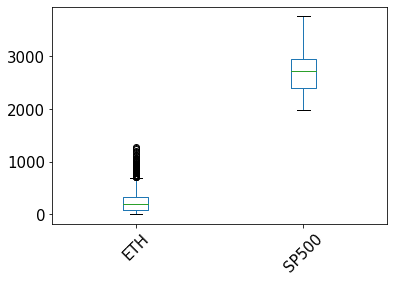

In [37]:
data.boxplot(column = ['ETH', 'SP500'], grid=False, rot=45, fontsize=15) 

In [38]:
# Null hypothesis, Alt. hypothesis, Modeling 

In [39]:
# Null hypothesis: There is no correlation between the performance of the S&P 500 and Ethereum during the past 5 years. 
# Alt. hypothesis: There is a correlation between the performance of the S&P 500 and Ethereum during the past 5 years.   

In [40]:
# Correlation

In [41]:
correlation = data.corr() 
print(correlation) 

            ETH     SP500
ETH    1.000000  0.466259
SP500  0.466259  1.000000


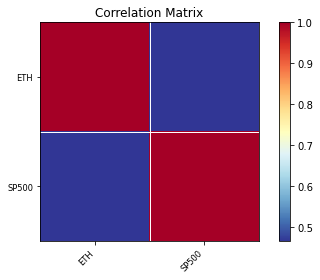

In [42]:
sm.graphics.plot_corr(correlation,xnames=list(correlation.columns))
plt.show() 

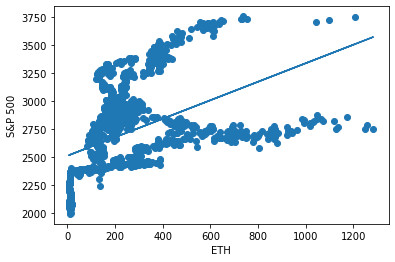

In [43]:
plt.scatter(data['ETH'], data['SP500']) 
plt.xlabel('ETH') 
plt.ylabel('S&P 500') 
x = data['ETH']
y = data['SP500'] 
m, b = np.polyfit(x, y, 1) 
plt.plot(x, m*x + b) 
plt.show()

In [44]:
covariance = np.cov(data['ETH'], data['SP500'])  
print(covariance) 

[[ 52952.47834431  43797.5727047 ]
 [ 43797.5727047  166632.13975056]]


In [45]:
import scipy.stats as stats
pearson_r = stats.pearsonr(data['ETH'], data['SP500'])  
print(pearson_r) 

(0.4662593039301599, 1.172962869823389e-66)


In [46]:
spearman_r = stats.spearmanr(data['ETH'], data['SP500']) 
print(spearman_r) 

SpearmanrResult(correlation=0.5722639665247796, pvalue=1.0377746171226677e-106)


In [47]:
# Linear Regression 
from scipy.stats import linregress
linregress(data['ETH'], data['SP500']) 

LinregressResult(slope=0.8271109129192197, intercept=2508.9182463458105, rvalue=0.46625930393015996, pvalue=1.1729628698239437e-66, stderr=0.04503990293151255)

In [48]:
# Since our p-value is lower than 0.05 we can reject the null hypothesis, and therefore, we can statistically say that Ethereum and stock prices (S&P 500) are moving together.